In [11]:
import pandas as pd

df = pd.read_csv('cleaned_data.csv')

In [12]:
df

,Unnamed: 0,embedded,label
0,0,[-5.96681118e-01 4.11902845e-01 -3.08486857e-...,1
1,1,[-6.81407630e-01 4.91403908e-01 -1.21448785e-...,1
2,2,[-5.65098464e-01 5.53117573e-01 -3.84215899e-...,1
3,3,[-3.87674928e-01 2.98460498e-02 2.36579791e-...,1
4,4,[-3.86169583e-01 3.35951298e-01 -1.87801272e-...,1
...,...,...,...
11610,11610,[-8.07900906e-01 3.43788892e-01 8.81809518e-...,0
11611,11611,[-9.04891670e-01 2.89417118e-01 -2.94612855e-...,0
11612,11612,[-6.90551698e-01 1.35520011e-01 -2.52938084e-...,0
11613,11613,[-7.32276261e-01 5.08924425e-01 -2.66482718e-...,0


In [13]:
df = df.drop('Unnamed: 0', axis=1)

In [14]:
df

,embedded,label
0,[-5.96681118e-01 4.11902845e-01 -3.08486857e-...,1
1,[-6.81407630e-01 4.91403908e-01 -1.21448785e-...,1
2,[-5.65098464e-01 5.53117573e-01 -3.84215899e-...,1
3,[-3.87674928e-01 2.98460498e-02 2.36579791e-...,1
4,[-3.86169583e-01 3.35951298e-01 -1.87801272e-...,1
...,...,...
11610,[-8.07900906e-01 3.43788892e-01 8.81809518e-...,0
11611,[-9.04891670e-01 2.89417118e-01 -2.94612855e-...,0
11612,[-6.90551698e-01 1.35520011e-01 -2.52938084e-...,0
11613,[-7.32276261e-01 5.08924425e-01 -2.66482718e-...,0


In [15]:
df['label'].value_counts()

label
1    5828
0    5787
Name: count, dtype: int64

In [16]:
import pandas as pd
import numpy as np
import ast
import re

# Define a cleanup function
def fix_and_eval(vector_str):
    try:
        # Insert missing commas between adjacent numbers using regex
        cleaned_str = re.sub(r'(?<=[\deE])\s+(?=[\-\d])', ', ', vector_str.strip())
        return np.array(ast.literal_eval(cleaned_str))
    except Exception as e:
        print("Error parsing:", vector_str[:100], "\nError:", e)
        return np.nan

# Apply the cleanup function
df['embedded'] = df['embedded'].apply(fix_and_eval)

# Optional: drop rows with failed parsing
df = df.dropna(subset=['embedded'])
from sklearn.model_selection import train_test_split

X = np.stack(df['embedded'].values)
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss, roc_curve, auc

# Example Data (Use your own dataset here)
# X, y = your_data

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Development

## Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='lbfgs')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    
    return model, y_pred


In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(model, X_test, y_test):
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()


Accuracy: 0.5208781747739991
Precision: 0.533167495854063
Recall: 0.5389773679798826
F1 Score: 0.5360566902876198


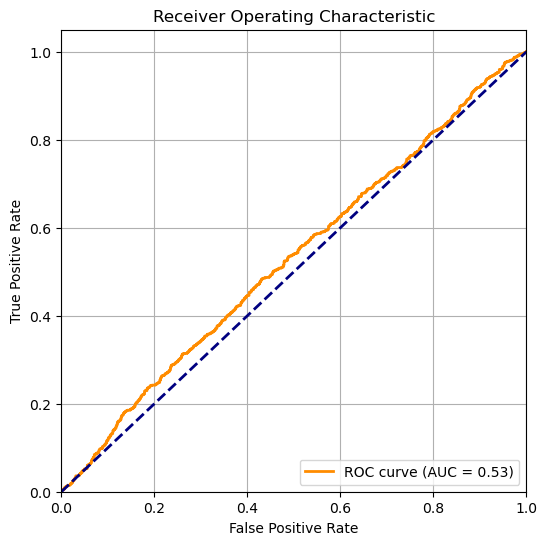

In [20]:
model, y_pred = train_logistic_regression(X_train, y_train, X_test, y_test)
plot_roc_curve(model, X_test, y_test)


## SVM

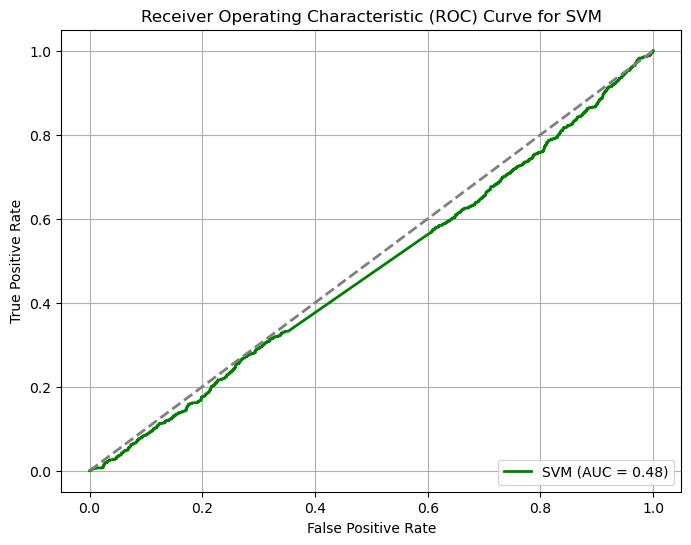

In [21]:
from sklearn.svm import SVC

# Instantiate SVM model with probability estimation
svm = SVC(kernel='linear', probability=True)

# Train the SVM model
svm.fit(X_train, y_train)

# ROC Curve for SVM
y_pred_prob_svm = svm.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC curve for SVM
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='green', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## Decision Tree

## Naive Bayes

## Neural Networks

## Bagging - with top 3 performing models

## Boosting - Gradient Boosting 

# ROC Curve Analysis

## Graphing

## Analyzing

# Evaluation Functions

## Confusion Matrix

## F-1 Precision Recall